In [2]:
!mkdir -p Heart_Disease_Project/data
!mv heart_disease_clean_train.csv Heart_Disease_Project/data/
!mv heart_disease_clean_test.csv Heart_Disease_Project/data/


In [3]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the cleaned train dataset (from Step 2.1)
train_df = pd.read_csv("Heart_Disease_Project/data/heart_disease_clean_train.csv")
test_df  = pd.read_csv("Heart_Disease_Project/data/heart_disease_clean_test.csv")

# Separate features and target
X_train = train_df.drop(columns=["target"])
y_train = train_df["target"]
X_test  = test_df.drop(columns=["target"])
y_test  = test_df["target"]

print("Train shape:", X_train.shape, " Test shape:", X_test.shape)


Train shape: (736, 28)  Test shape: (184, 28)


In [4]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# Apply PCA without fixing components first
pca = PCA(n_components=None, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca  = pca.transform(X_test_scaled)

print("Original features:", X_train.shape[1])
print("PCA features available:", X_train_pca.shape[1])


Original features: 28
PCA features available: 28


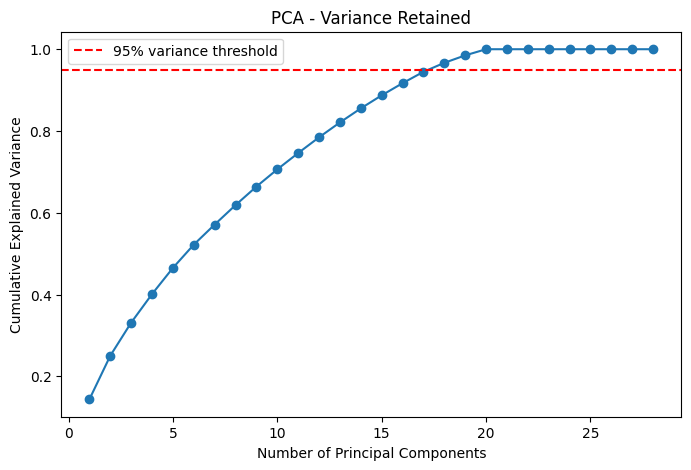

Components for 95% variance: 18


In [5]:
explained = pca.explained_variance_ratio_
cum_var = np.cumsum(explained)

plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained)+1), cum_var, marker="o")
plt.axhline(y=0.95, color="r", linestyle="--", label="95% variance threshold")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Variance Retained")
plt.legend()
plt.show()

print("Components for 95% variance:", np.argmax(cum_var >= 0.95) + 1)


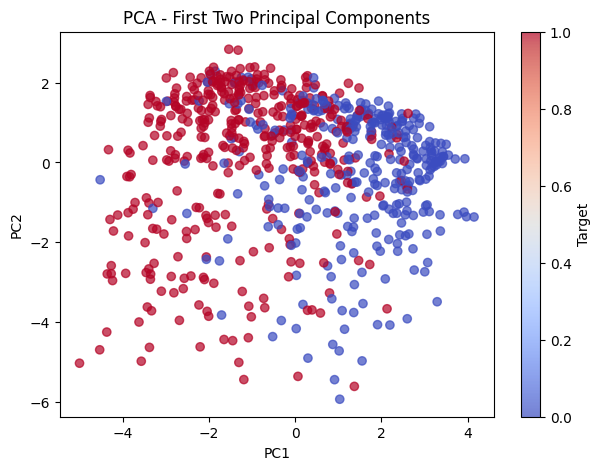

In [6]:
plt.figure(figsize=(7,5))
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train, cmap="coolwarm", alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA - First Two Principal Components")
plt.colorbar(label="Target")
plt.show()


In [7]:
train_pca_df = pd.DataFrame(X_train_pca, columns=[f"PC{i+1}" for i in range(X_train_pca.shape[1])])
train_pca_df["target"] = y_train.values

test_pca_df = pd.DataFrame(X_test_pca, columns=[f"PC{i+1}" for i in range(X_test_pca.shape[1])])
test_pca_df["target"] = y_test.values

train_pca_df.to_csv("Heart_Disease_Project/data/heart_disease_pca_train.csv", index=False)
test_pca_df.to_csv("Heart_Disease_Project/data/heart_disease_pca_test.csv", index=False)

print("Saved PCA-transformed train/test datasets!")


Saved PCA-transformed train/test datasets!
